In [8]:
import json
import argparse
import json
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def load_json_logs(json_logs):
    # load and convert json_logs to log_dict, key is epoch, value is a sub dict
    # keys of sub dict is different metrics, e.g. memory, bbox_mAP
    # value of sub dict is a list of corresponding values of all iterations
    log_dicts = [dict() for _ in json_logs]
    for json_log, log_dict in zip(json_logs, log_dicts):
        with open(json_log, 'r') as log_file:
            for l in log_file:
                log = json.loads(l.strip())
                epoch = log.pop('epoch')
                if epoch not in log_dict:
                    log_dict[epoch] = defaultdict(list)
                for k, v in log.items():
                    log_dict[epoch][k].append(v)
    return log_dicts

def plot_curve(log_dicts, json_logs, backend=None, keys=['loss_cls'], legend=None, out=None, style='white', title=None):
    if backend is not None:
            plt.switch_backend(backend)
    sns.set_style(style)
    # if legend is None, use {filename}_{key} as legend
    if legend is None:
        legend = []
        for json_log in json_logs:
            for metric in keys:
                legend.append('{}_{}'.format(json_log, metric))

    assert len(legend) == (len(json_logs) * len(keys))
    metrics = keys

    num_metrics = len(metrics)
    for i, log_dict in enumerate(log_dicts):
        epochs = list(log_dict.keys())
        hasMAP = False
        for j, metric in enumerate(metrics):
            if 'mAP' in metric:
                hasMAP=True
            
        for j, metric in enumerate(metrics):
            print('plot curve of {}, metric is {}'.format(
                json_logs[i], metric))
            if metric not in log_dict[epochs[0]]:
                raise KeyError('{} does not contain metric {}'.format(
                    json_logs[i], metric))

            if hasMAP:
                xs = np.arange(1, max(epochs) + 1)
                ys = []
                for epoch in epochs:
                    if(len(log_dict[epoch][metric]) >0):
                        ys.append(log_dict[epoch][metric][-1])
                    elif len(ys) > 0:
                        ys.append(ys[-1])
                    else:
                        ys.append(0)
                xs = xs[:len(ys)]
                ax = plt.gca()
                ax.set_xticks(xs)
                plt.xlabel('epoch')
                plt.plot(xs, ys, label=legend[i * num_metrics + j], marker='o')
            else:
                xs = []
                ys = []
                num_iters_per_epoch = log_dict[epochs[0]]['iter'][-1]
                for epoch in epochs:
                    iters = log_dict[epoch]['iter']
                    if log_dict[epoch]['mode'][-1] == 'val':
                        iters = iters[:-1]
                    xs.append(
                        np.array(iters) + (epoch - 1) * num_iters_per_epoch)
                    ys.append(np.array(log_dict[epoch][metric][:len(iters)]))
                xs = np.concatenate(xs)
                ys = np.concatenate(ys)
                plt.xlabel('iter')
                plt.plot(
                    xs, ys, label=legend[i * num_metrics + j], linewidth=0.5)
            plt.legend()
            plt.grid()
        if title is not None:
            plt.title(title)
    if out is None:
        plt.show()
    else:
        print('save curve to: {}'.format(out))
        plt.savefig(out)
        plt.cla()
        



In [9]:
import os
os.listdir('work_dirs/libra_20200107')


['epoch_1.pth',
 '20200108_201554.log',
 'epoch_2.pth',
 'epoch_3.pth',
 '20200108_201554.log.json',
 'latest.pth']

In [10]:
json_logs = ['work_dirs/libra_20200107/20200108_201554.log.json']
log_dict = load_json_logs(json_logs)
#print(type(log_dict[0]))
#log_dict1 = load_json_logs(['work_dirs/libra_20191205_0/20191205_204911.log.json'])
#log_dict[0]={**log_dict[0],**log_dict1[0]}
#print(log_dict[0])

plot curve of work_dirs/libra_20200107/20200108_201554.log.json, metric is lr


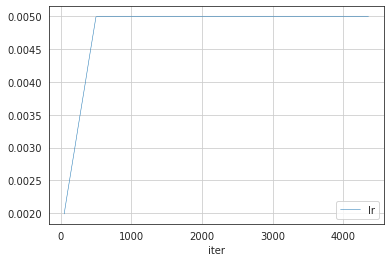

plot curve of work_dirs/libra_20200107/20200108_201554.log.json, metric is loss


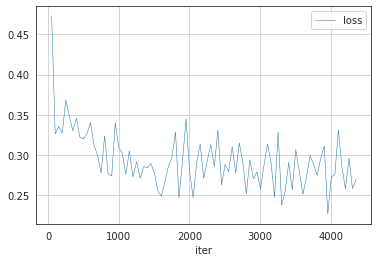

plot curve of work_dirs/libra_20200107/20200108_201554.log.json, metric is bbox_mAP_50


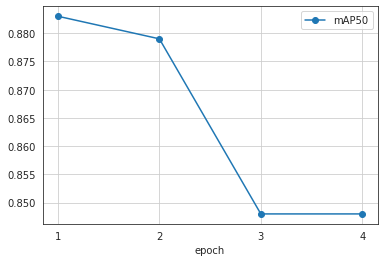

In [11]:
#json_logs = ['work_dirs/20191024_01/20191024_232211.log.json']
#json_logs = ['work_dirs/libra_20191205_0/20191205_094052.log.json']
#log_dict = load_json_logs(json_logs)
#log_dict1 = load_json_logs(['work_dirs/libra_20191205_0/20191205_204911.log.json'])

#log_dict1 = load_json_logs(['work_dirs/libra_20191205_0/20191205_204911.log.json'])
#log_dict[0]={**log_dict[0],**log_dict1[0]}


plot_curve(log_dict, json_logs, keys=['lr'], legend=['lr'])
plot_curve(log_dict, json_logs, keys=['loss'], legend=['loss'])
plot_curve(log_dict, json_logs, keys=['bbox_mAP_50'], legend=['mAP50'])
#plot_curve(log_dict, json_logs, keys=['bbox_mAP_50'], legend=['mAP_50_07', 'mAP_50_08'])

plot curve of work_dirs/20191029_01/20191029_160226.log.json, metric is lr
plot curve of work_dirs/20191030_01/20191030_081237.log.json, metric is lr
plot curve of work_dirs/20191101_01/20191101_110246.log.json, metric is lr
plot curve of work_dirs/20191101_02/20191101_153314.log.json, metric is lr


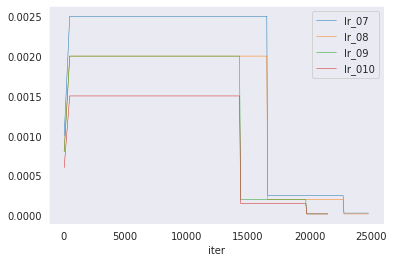

plot curve of work_dirs/20191029_01/20191029_160226.log.json, metric is loss
plot curve of work_dirs/20191030_01/20191030_081237.log.json, metric is loss
plot curve of work_dirs/20191101_01/20191101_110246.log.json, metric is loss
plot curve of work_dirs/20191101_02/20191101_153314.log.json, metric is loss


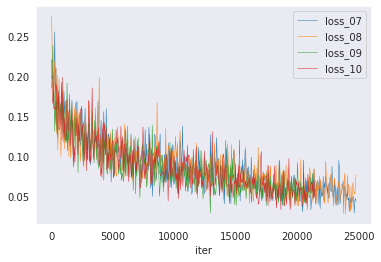

plot curve of work_dirs/20191029_01/20191029_160226.log.json, metric is bbox_mAP_50
plot curve of work_dirs/20191030_01/20191030_081237.log.json, metric is bbox_mAP_50
plot curve of work_dirs/20191101_01/20191101_110246.log.json, metric is bbox_mAP_50
plot curve of work_dirs/20191101_02/20191101_153314.log.json, metric is bbox_mAP_50


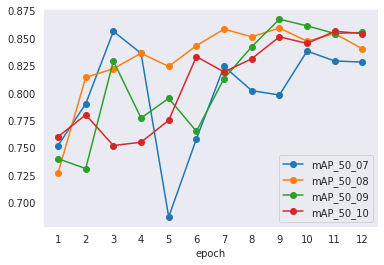

In [5]:
#json_logs = ['work_dirs/20191024_01/20191024_232211.log.json']
json_logs = ['work_dirs/20191029_01/20191029_160226.log.json', 'work_dirs/20191030_01/20191030_081237.log.json', 'work_dirs/20191101_01/20191101_110246.log.json', 'work_dirs/20191101_02/20191101_153314.log.json', 'work_dirs/libra_20191202_0/20191202_131753.log.json']
log_dict = load_json_logs(json_logs)

plot_curve(log_dict, json_logs, keys=['lr'], legend=['lr_07', 'lr_08', 'lr_09', 'lr_010', 'lr_libra'])
plot_curve(log_dict, json_logs, keys=['loss'], legend=['loss_07', 'loss_08', 'loss_09', 'loss_10', 'loss_libra'])
plot_curve(log_dict, json_logs, keys=['bbox_mAP_50'], legend=['mAP_50_07', 'mAP_50_08', 'mAP_50_09', 'mAP_50_10', 'map50_libra'])
#plot_curve(log_dict, json_logs, keys=['bbox_mAP', 'loss'], legend=['mAP_07', 'loss_07','mAP_08', 'loss_08'])


In [5]:
log_dict[0]

{1: defaultdict(list,
             {'mode': ['train',
               'train',
               'train',
               'train',
               'train',
               'train',
               'train',
               'train',
               'train',
               'train',
               'train',
               'train',
               'train',
               'train',
               'train',
               'train',
               'train',
               'train',
               'train',
               'train',
               'train',
               'train',
               'train',
               'train',
               'train',
               'train',
               'train',
               'train',
               'train',
               'train',
               'train',
               'train',
               'train',
               'train',
               'train',
               'train',
               'train',
               'train',
               'train',
               'train',
          